In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sci_notation

In [5]:
import os
import pandas as pd
from scipy import stats

In [6]:
savedir = '/home/knight/matar/NHB_submission_2017'
savefig = True

In [131]:
base = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(base, 'PCA', 'csvs_FINAL', 'Supp_Table1.csv')
df = pd.read_csv(filename)

filename = os.path.join(base, 'PCA', 'csvs_FINAL', 'RTs_Mot_PFC_Sens_crossover.csv')
dfRT = pd.read_csv(filename)

filename = os.path.join(base, 'PCA', 'csvs_FINAL', 'all_subj_latencies_meanbyregion.csv')
df_lats = pd.read_csv(filename, skiprows=3, header=None)
df_lats.columns = ['subj','task','region', 'lat','RT_median','elec_count','start_idx']

In [125]:
dfmean = df_lats.reset_index().groupby('region').mean()
dfsem = df_lats.reset_index().groupby('region').sem()

# across trials
## ROIs

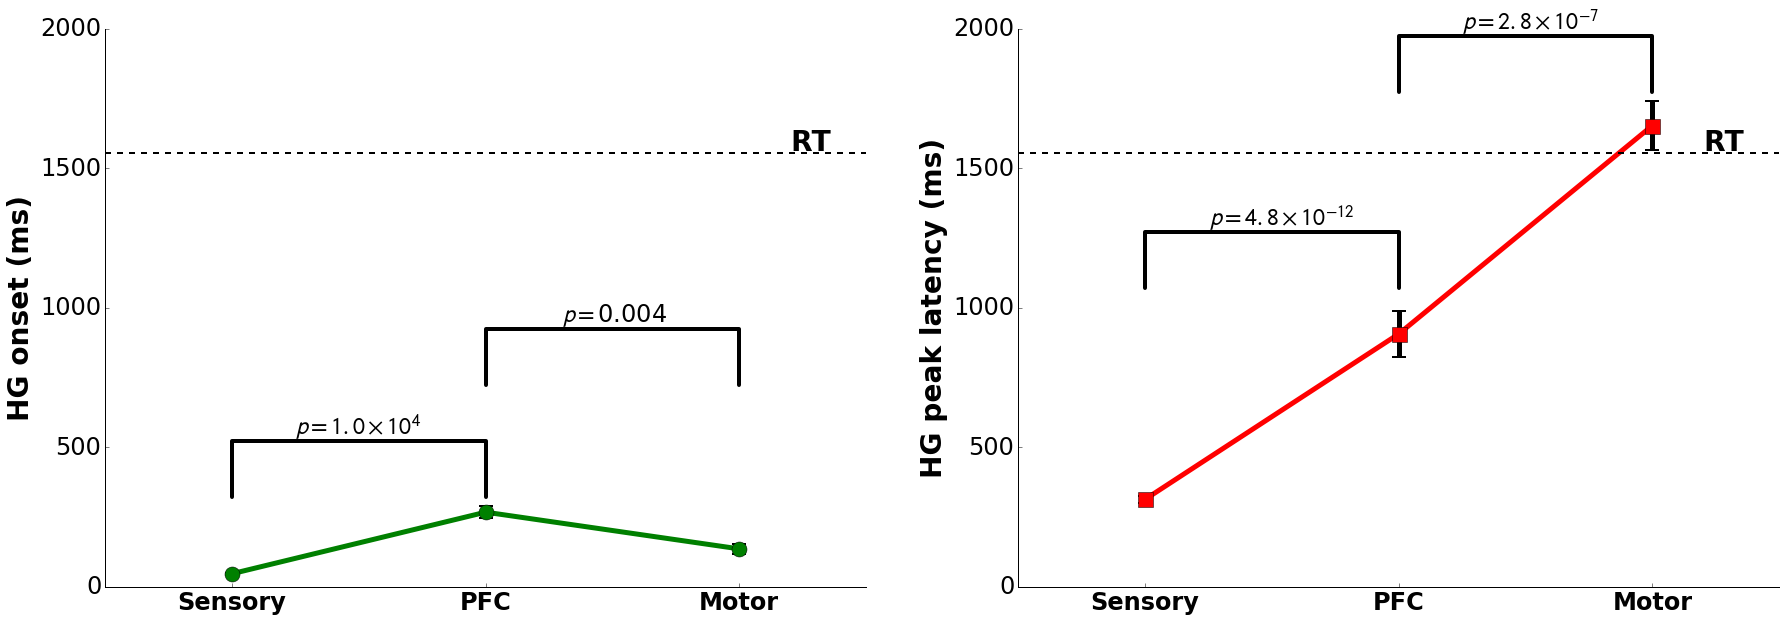

In [87]:
f,ax = plt.subplots(1, 2, figsize = (30,10))

ind = np.arange(3)
width = 0.35  

patterns = ['Sensory','PFC','Motor']
x = range(len(patterns))

for i in range(2):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].set_xlim([x[0]-.5, x[-1]+.5])
    ax[i].yaxis.set_tick_params(labelsize = 24)
    xTickMarks = patterns
    ax[i].set_xticks(x)
    xtickNames = ax[i].set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')
    ax[i].set_ylim([0, 2000])
    

yerr = [df[df.pattern == p].HG_onset_sem.values[0] for p in patterns]
y = [df[df.pattern == p].HG_onset_mean.values[0] for p in patterns]

ax[0].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[0].plot(x, y, lw = 5, marker='o', color = 'green',  markersize =15, label = 'HG onsets')
ax[0].set_ylabel('HG onset (ms)',weight = 'bold', fontsize = 28)

yerr = [df[df.pattern == p].HG_peak_sem.values[0] for p in patterns]
y = [df[df.pattern == p].HG_peak_mean.values[0] for p in patterns]

ax[1].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[1].plot(x, y, lw = 5, marker='s', color = 'red', markersize =15, label = 'HG peak latencies')
ax[1].set_ylabel('HG peak latency (ms)',weight = 'bold', fontsize = 28)

y = dfRT['RT bin'].mean()
for i in range(2):
    ax[i].axhline(y = y, lw = 2, color = 'k', ls = '--')
    ax[i].annotate('RT', xy = (x[-1]+.2, y+7), fontsize = 28, weight = 'bold')


# #significance bars
props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'lw':4}


# for ROIs
ax[0].annotate(r"$p=$%s" %(sci_notation.sci_notation(.0001)), xy=(.25,550), zorder = 10, fontsize = 24)
ax[0].annotate('', xy=(0, 250), xytext=(1,250), arrowprops=props)

ax[0].annotate(r"$p=$%.3f" %(0.004), xy=(1.3, 950), zorder=10, fontsize = 24)#, weight = 'bold')
ax[0].annotate('', xy=(1, 650), xytext=(2,650), arrowprops=props)

ax[1].annotate(r"$p=$%s" %(sci_notation.sci_notation(4.8e-12)), xy=(.25,1295), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(0, 1000), xytext=(1,1000), arrowprops=props)

ax[1].annotate(r"$p=$%s" %(sci_notation.sci_notation(2.8e-7)), xy=(1.25,2000), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(1, 1700), xytext=(2,1700), arrowprops=props)


filename = os.path.join(savedir, 'FigS6_OnsetsAndLatencies_byROI_binnedtrials.png',)
plt.savefig(filename, dpi = 150)

# across trials
## patterns

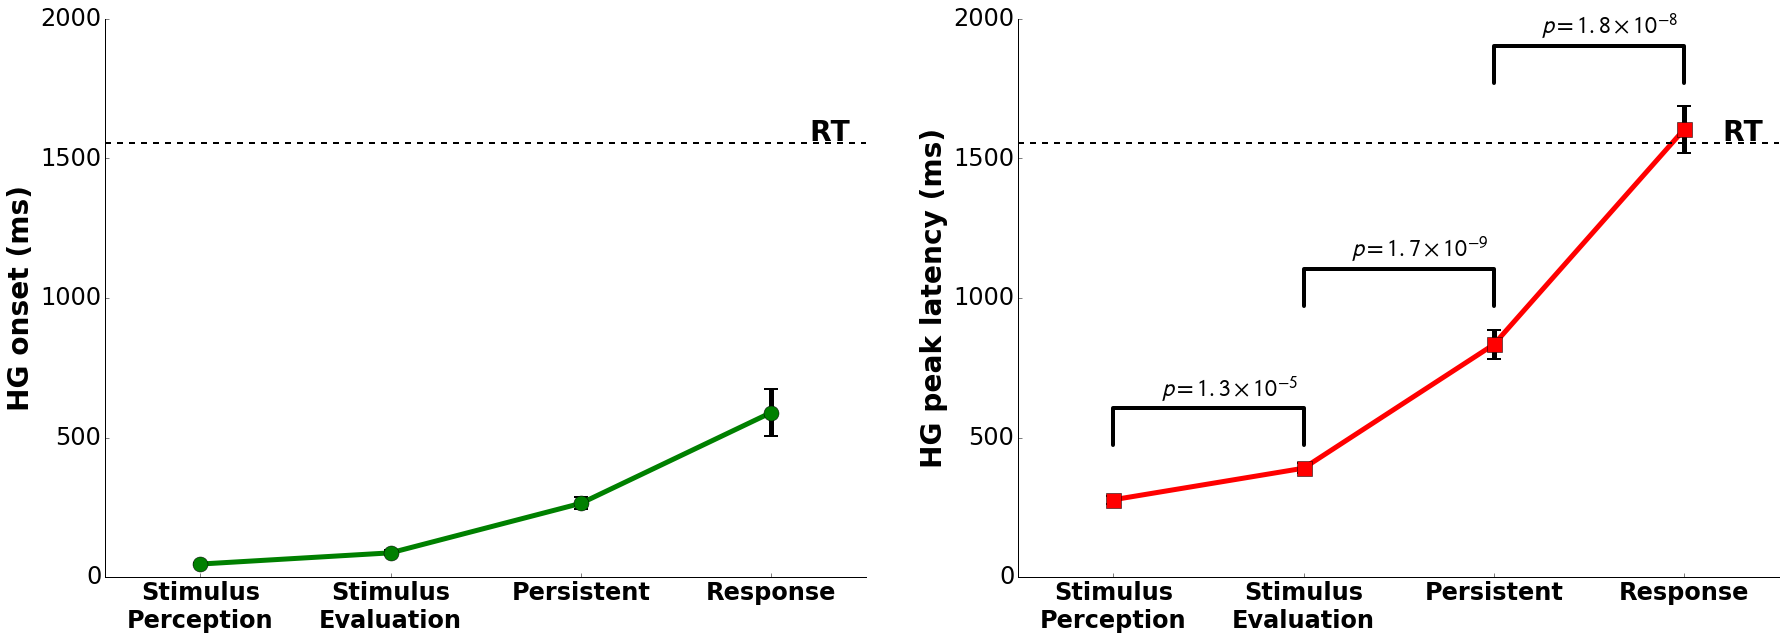

In [88]:
f,ax = plt.subplots(1, 2, figsize = (30,10))

ind = np.arange(4)
width = 0.35  

patterns = ['SR','S','D','R']
x = range(len(patterns))

for i in range(2):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].set_xlim([x[0]-.5, x[-1]+.5])
    ax[i].yaxis.set_tick_params(labelsize = 24)
    xTickMarks = ['Stimulus\nPerception','Stimulus\nEvaluation','Persistent','Response']
    ax[i].set_xticks(x)
    xtickNames = ax[i].set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')
    ax[i].set_ylim([0, 2000])
    

yerr = [df[df.pattern == p].HG_onset_sem.values[0] for p in patterns]
y = [df[df.pattern == p].HG_onset_mean.values[0] for p in patterns]

ax[0].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[0].plot(x, y, lw = 5, marker='o', color = 'green',  markersize =15, label = 'HG onsets')
ax[0].set_ylabel('HG onset (ms)',weight = 'bold', fontsize = 28)

yerr = [df[df.pattern == p].HG_peak_sem.values[0] for p in patterns]
y = [df[df.pattern == p].HG_peak_mean.values[0] for p in patterns]

ax[1].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[1].plot(x, y, lw = 5, marker='s', color = 'red', markersize =15, label = 'HG peak latencies')
ax[1].set_ylabel('HG peak latency (ms)',weight = 'bold', fontsize = 28)

y = dfRT['RT bin'].mean()
for i in range(2):
    ax[i].axhline(y = y, lw = 2, color = 'k', ls = '--')
    ax[i].annotate('RT', xy = (x[-1]+.2, y+7), fontsize = 28, weight = 'bold')


# #significance bars
props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'lw':4}


# for patterns
ax[1].annotate(r"$p=$%s" %(sci_notation.sci_notation(1.3e-5)), xy=(.25,650), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(0, 400), xytext=(1,400), arrowprops=props)

ax[1].annotate(r"$p=$%s" %(sci_notation.sci_notation(1.7e-9)), xy=(1.25,1150), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(1, 900), xytext=(2,900), arrowprops=props)

ax[1].annotate(r"$p=$%s" %(sci_notation.sci_notation(1.8e-8)), xy=(2.25,1950), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(2, 1700), xytext=(3,1700), arrowprops=props)


filename = os.path.join(savedir, 'FigS6_OnsetsAndLatencies_byROI_binnedtrials_2plots.png',)
plt.savefig(filename, dpi = 150)

# across datasets

In [45]:
xlfilePath = (os.path.join(savedir, 'ROI_latencies_by_dataset.xlsx'))
onsets = pd.read_excel(xlfilePath, sheetname='onsets')
lats = pd.read_excel(xlfilePath, sheetname='peaks')
rts = pd.read_excel(xlfilePath, sheetname='rts')

## by ROI

onsets

	Sensory vs PFC
	u = 80.0, p = 6.93990356891e-08
	PFC vs Motor
	u = 595.0, p = 0.839618382793
latencies

	Sensory vs PFC
	u = 61.0, p = 1.37756095201e-08
	PFC vs Motor
	u = 450.0, p = 0.117850895021


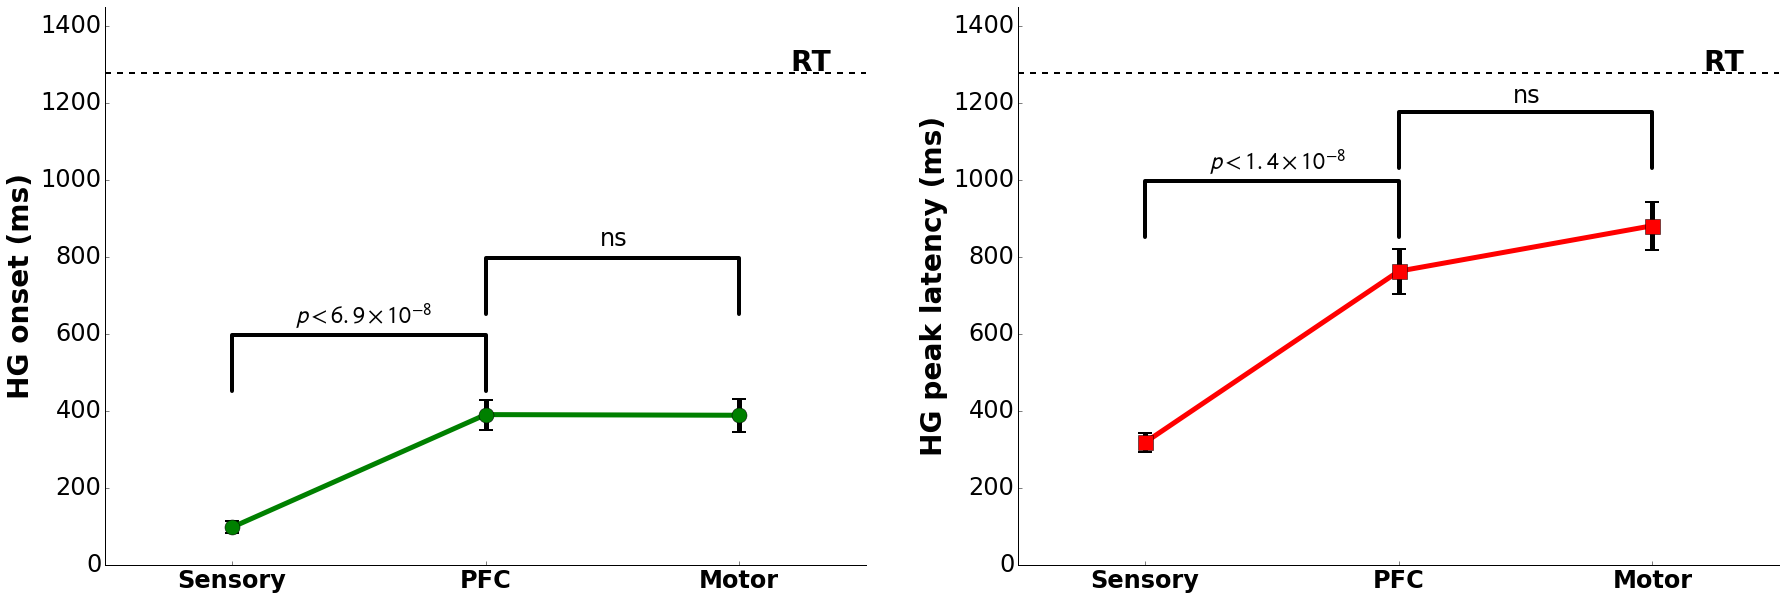

In [48]:
f,ax = plt.subplots(1, 2, figsize = (30,10))

ind = np.arange(3)
width = 0.35  

for i in range(2):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].set_xlim([-.5, 2.5])
    ax[i].yaxis.set_tick_params(labelsize = 24)
    xTickMarks = ['Sensory', 'PFC', 'Motor']
    ax[i].set_xticks([0,1,2])
    xtickNames = ax[i].set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')
    ax[i].set_ylim([0, 1450])
    
x = range(3)

yerr = onsets.apply(lambda x: x.dropna().sem(), axis =0).values
y = onsets.mean(axis = 0).values

ax[0].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[0].plot(x, y, lw = 5, marker='o', color = 'green',  markersize =15, label = 'HG onsets')
ax[0].set_ylabel('HG onset (ms)',weight = 'bold', fontsize = 28)

yerr = lats.apply(lambda x: x.dropna().sem(), axis =0).values
y = lats.mean(axis = 0).values

ax[1].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[1].plot(x, y, lw = 5, marker='s', color = 'red', markersize =15, label = 'HG peak latencies')
ax[1].set_ylabel('HG peak latency (ms)',weight = 'bold', fontsize = 28)

y = rts['Motor'].mean()
for i in range(2):
    ax[i].axhline(y = y, lw = 2, color = 'k', ls = '--')
    ax[i].annotate('RT', xy = (x[-1]+.2, y+7), fontsize = 28, weight = 'bold')

# #significance bars
props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'lw':4}

print ('onsets\n')
u, p =  stats.mannwhitneyu(onsets['Sensory'].dropna(), onsets['PFC'].dropna(), alternative='two-sided')
print('\tSensory vs PFC\n\tu = {0}, p = {1}'.format(u, p))
ax[0].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(.25,630), zorder = 10, fontsize = 24)
ax[0].annotate('', xy=(0, 400), xytext=(1,400), arrowprops=props)

u, p =  stats.mannwhitneyu(onsets['PFC'].dropna(), onsets['Motor'].dropna(), alternative='two-sided')
print('\tPFC vs Motor\n\tu = {0}, p = {1}'.format(u, p))
#ax[0].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(1.25,830), zorder = 10, fontsize = 24)
ax[0].annotate(r"%s" %('ns'), xy=(1.45,830), zorder = 10, fontsize = 24)
ax[0].annotate('', xy=(1, 600), xytext=(2,600), arrowprops=props)


print ('latencies\n')
u, p =  stats.mannwhitneyu(lats['Sensory'].dropna(), lats['PFC'].dropna(), alternative='two-sided')
print('\tSensory vs PFC\n\tu = {0}, p = {1}'.format(u, p))
ax[1].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(.25,1030), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(0, 800), xytext=(1,800), arrowprops=props)

u, p =  stats.mannwhitneyu(lats['PFC'].dropna(), lats['Motor'].dropna(), alternative='two-sided')
print('\tPFC vs Motor\n\tu = {0}, p = {1}'.format(u, p))
# ax[1].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(1.25,1200), zorder = 10, fontsize = 24)
ax[1].annotate(r"%s" %('ns'), xy=(1.45,1200), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(1, 980), xytext=(2,980), arrowprops=props)

filename = os.path.join(savedir, 'FigS6_OnsetsAndLatencies_byROI_bydataset.png')

plt.savefig(filename, dpi = 150)

# across datasets
## by pattern

In [49]:
xlfilePath = (os.path.join(savedir, 'HG_types_latencies_by_dataset.xlsx'))
onsets = pd.read_excel(xlfilePath, sheetname='onsets')
lats = pd.read_excel(xlfilePath, sheetname='peaks')
rts = pd.read_excel(xlfilePath, sheetname='rts')

onsets

	Early Stim vs Late Stim
	u = 80.0, p = 0.0205130532457
	Late Stim vs Persistent
	u = 107.0, p = 0.00900035990762
	Persistent vs Response
	u = 194.0, p = 0.000735343188895
latencies

	Early Stim vs Late Stim
	u = 127.0, p = 0.453254704754
	Late Stim vs Persistent
	u = 61.5, p = 0.000162248602305
	Persistent vs Response
	u = 145.0, p = 3.20752159225e-05


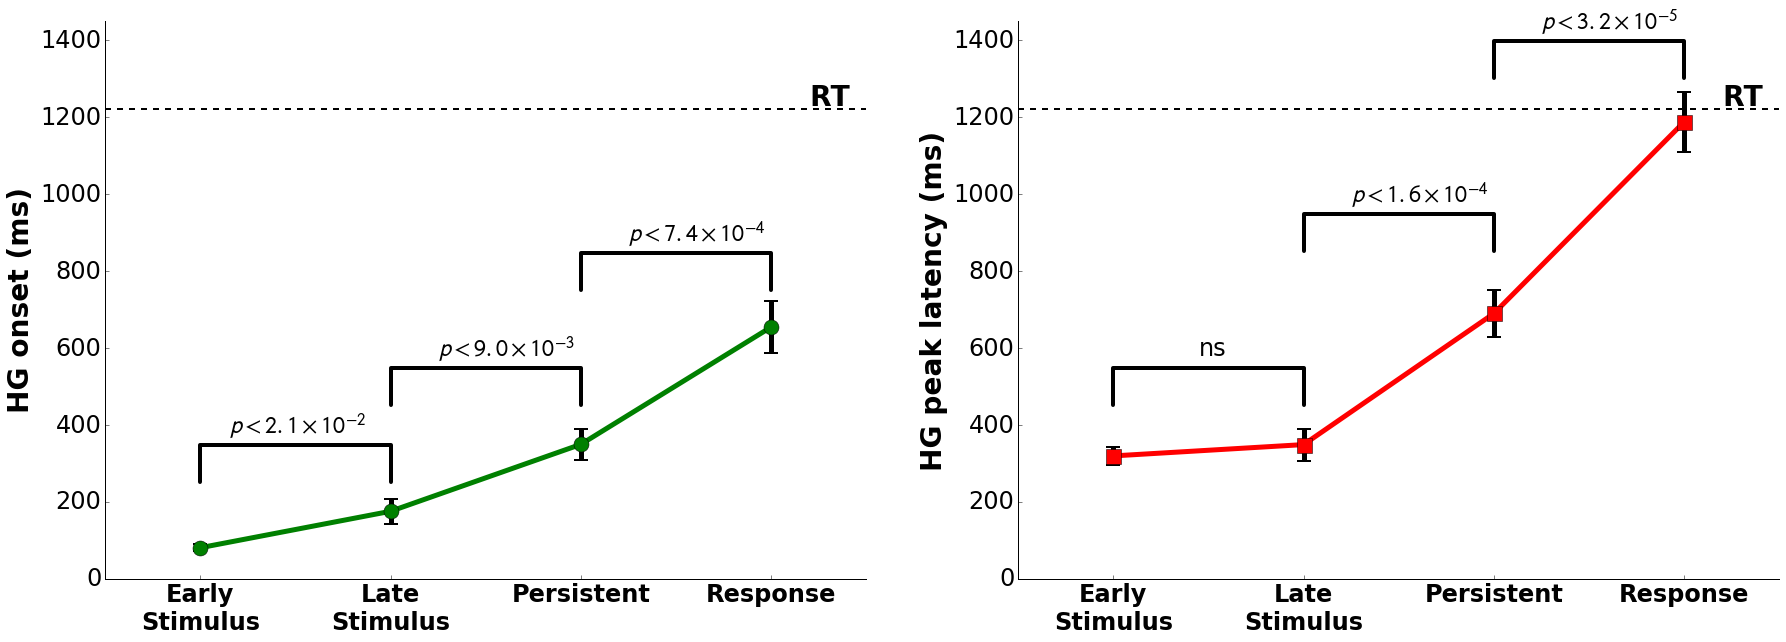

In [52]:
f,ax = plt.subplots(1, 2, figsize = (30,10))

ind = np.arange(4)
width = 0.35  

for i in range(2):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].set_xlim([-.5, 3.5])
    ax[i].yaxis.set_tick_params(labelsize = 24)
    xTickMarks = ['Early\nStimulus', 'Late\nStimulus', 'Persistent', 'Response']
    ax[i].set_xticks([0,1,2,3])
    xtickNames = ax[i].set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')
    ax[i].set_ylim([0, 1450])
    
x = range(4)

yerr = onsets.apply(lambda x: x.dropna().sem(), axis =0).values
y = onsets.mean(axis = 0).values

ax[0].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[0].plot(x, y, lw = 5, marker='o', color = 'green',  markersize =15, label = 'HG onsets')
ax[0].set_ylabel('HG onset (ms)',weight = 'bold', fontsize = 28)

yerr = lats.apply(lambda x: x.dropna().sem(), axis =0).values
y = lats.mean(axis = 0).values

ax[1].errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax[1].plot(x, y, lw = 5, marker='s', color = 'red', markersize =15, label = 'HG peak latencies')
ax[1].set_ylabel('HG peak latency (ms)',weight = 'bold', fontsize = 28)

y = rts['Response'].mean()
for i in range(2):
    ax[i].axhline(y = y, lw = 2, color = 'k', ls = '--')
    ax[i].annotate('RT', xy = (x[-1]+.2, y+7), fontsize = 28, weight = 'bold')

# #significance bars
props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'lw':4}

print ('onsets\n')
u, p =  stats.mannwhitneyu(onsets['Early Stim'].dropna(), onsets['Late Stim'].dropna(), alternative='two-sided')
print('\tEarly Stim vs Late Stim\n\tu = {0}, p = {1}'.format(u, p))
ax[0].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(.15,380), zorder = 10, fontsize = 24)
ax[0].annotate('', xy=(0, 200), xytext=(1,200), arrowprops=props)

u, p =  stats.mannwhitneyu(onsets['Late Stim'].dropna(), onsets['Persistent'].dropna(), alternative='two-sided')
print('\tLate Stim vs Persistent\n\tu = {0}, p = {1}'.format(u, p))
ax[0].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(1.25,580), zorder = 10, fontsize = 24)
ax[0].annotate('', xy=(1, 400), xytext=(2,400), arrowprops=props)

u, p =  stats.mannwhitneyu(onsets['Persistent'].dropna(), onsets['Response'].dropna(), alternative='two-sided')
print('\tPersistent vs Response\n\tu = {0}, p = {1}'.format(u, p))
ax[0].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(2.25,880), zorder = 10, fontsize = 24)
ax[0].annotate('', xy=(2, 700), xytext=(3,700), arrowprops=props)


print ('latencies\n')
u, p =  stats.mannwhitneyu(lats['Early Stim'].dropna(), lats['Late Stim'].dropna(), alternative='two-sided')
print('\tEarly Stim vs Late Stim\n\tu = {0}, p = {1}'.format(u, p))
#ax[1].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(.15,580), zorder = 10, fontsize = 24)
ax[1].annotate(r"%s" %('ns'), xy=(.45,580), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(0, 400), xytext=(1,400), arrowprops=props)

u, p =  stats.mannwhitneyu(lats['Late Stim'].dropna(), lats['Persistent'].dropna(), alternative='two-sided')
print('\tLate Stim vs Persistent\n\tu = {0}, p = {1}'.format(u, p))
ax[1].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(1.25,980), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(1, 800), xytext=(2,800), arrowprops=props)

u, p =  stats.mannwhitneyu(lats['Persistent'].dropna(), lats['Response'].dropna(), alternative='two-sided')
print('\tPersistent vs Response\n\tu = {0}, p = {1}'.format(u, p))
ax[1].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(2.25,1430), zorder = 10, fontsize = 24)
ax[1].annotate('', xy=(2, 1250), xytext=(3,1250), arrowprops=props)

filename = os.path.join(savedir, 'FigS6_OnsetsAndLatencies_bypattern_bydataset.png')

plt.savefig(filename, dpi = 150)